# Visualizing statistical relationships

Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

### 1. Numerical Data Ploting
- relplot()
- scatterplot()
- lineplot()

### 2. Categorical Data Ploting
- catplot()
- boxplot()
- stripplot()
- swarmplot()
- etc...

### 3. Visualizing Distribution of the Data
- distplot()
- kdeplot()
- jointplot()
- rugplot()

### 4. Linear Regression and Relationship
- regplot()
- lmplot()

### 5. Controlling Ploted Figure Aesthetics
- figure styling
- axes styling
- color palettes
- etc..

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set(style = 'darkgrid')

In [3]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [7]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
tips['size']

0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: size, Length: 244, dtype: int64

<AxesSubplot:>

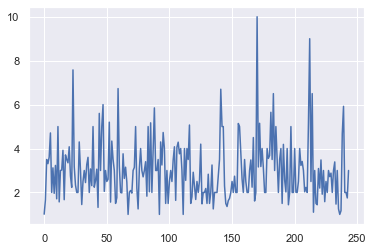

In [9]:
tips['tip'].plot()

In [12]:
tips['tip'].min()

1.0

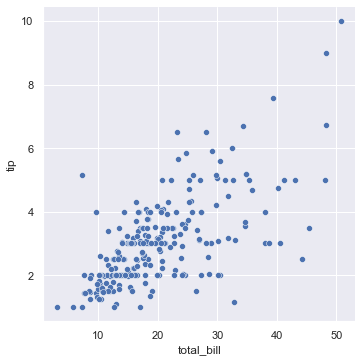

In [13]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips)

In [14]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

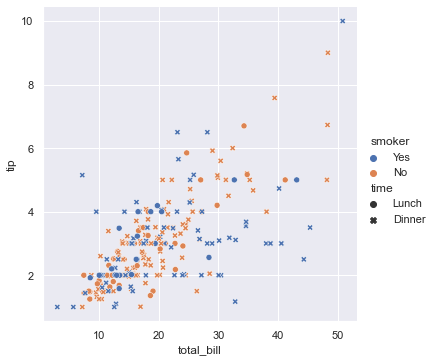

In [15]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', style = 'time')

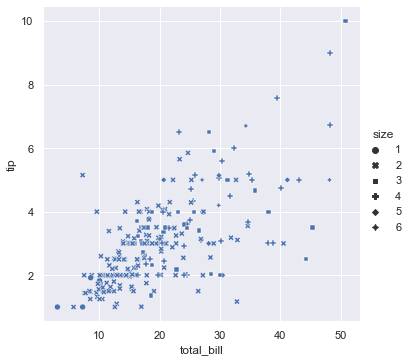

In [16]:
sns.relplot(x = 'total_bill', y = 'tip', style = 'size', data = tips)

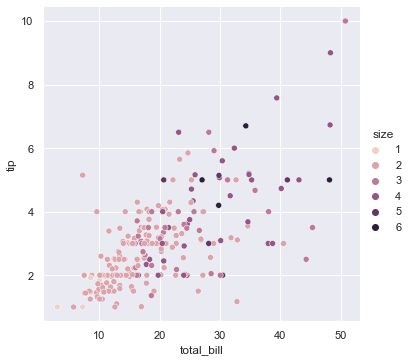

In [17]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'size', data = tips)

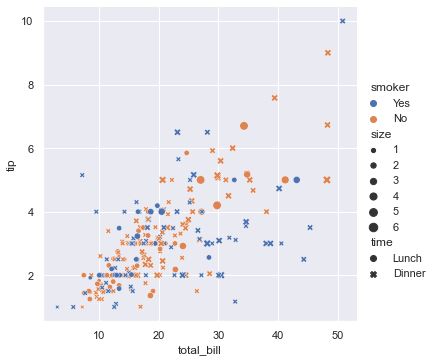

In [18]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips,hue = 'smoker', style = 'time', size = 'size')

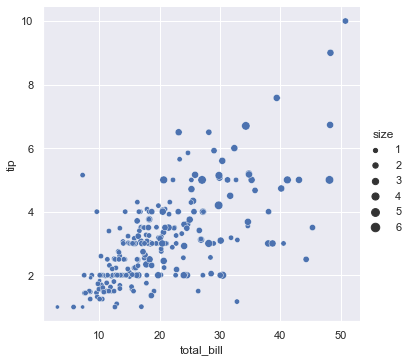

In [19]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, size = 'size')

In [20]:
from numpy.random import randn

In [25]:
df = pd.DataFrame(dict(time = np.arange(500), value = randn(500).cumsum()))

In [26]:
df.head()

,time,value
0,0,2.834438
1,1,2.019013
2,2,2.017268
3,3,1.823647
4,4,0.910280


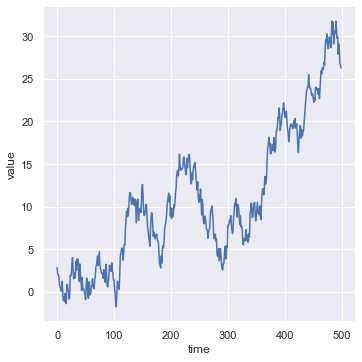

In [27]:
sns.relplot(x = 'time', y = 'value', kind = 'line', data = df, sort = True)

In [28]:
df = pd.DataFrame(randn(500, 2).cumsum(axis = 0), columns = ['time', 'value'])

In [29]:
df.head()

,time,value
0,0.103232,0.186137
1,0.025632,1.419940
2,-1.505687,2.330769
3,-1.116511,3.558659
4,-2.193923,3.628742


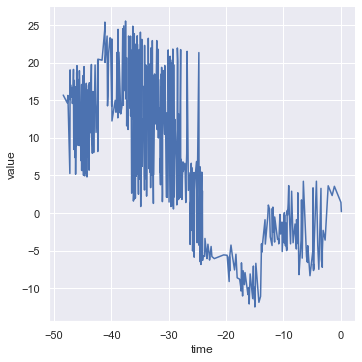

In [30]:
sns.relplot(x = 'time', y = 'value', kind = 'line', data = df, sort = True)

In [31]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [32]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [33]:
fmri.isnull().sum()

subject      0
timepoint    0
event        0
region       0
signal       0
dtype: int64

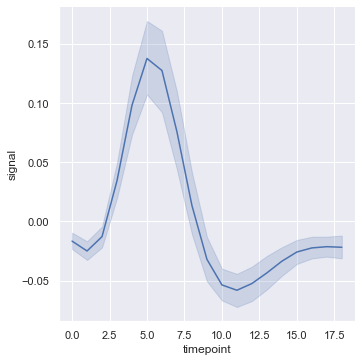

In [34]:
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', data = fmri)

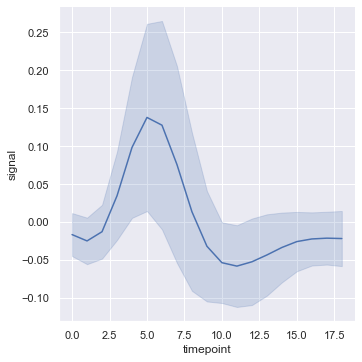

In [35]:
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', data = fmri, ci = 'sd')

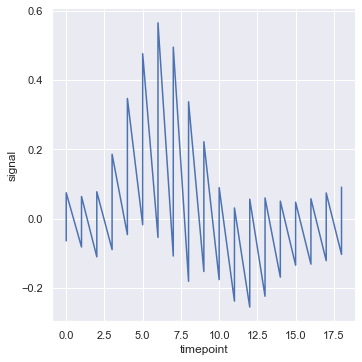

In [36]:
sns.relplot(x = 'timepoint', y = 'signal', estimator = None, kind = 'line', data = fmri)

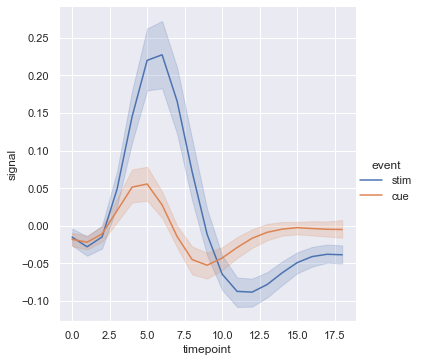

In [37]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event', kind = 'line', data = fmri)

In [26]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


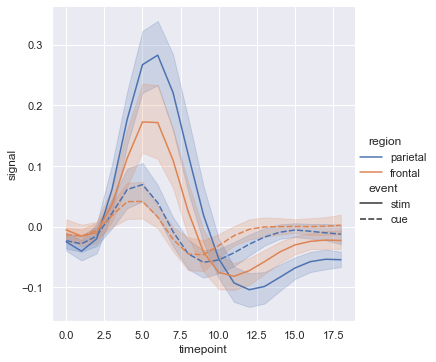

In [39]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', style = 'event', kind = 'line', data = fmri)

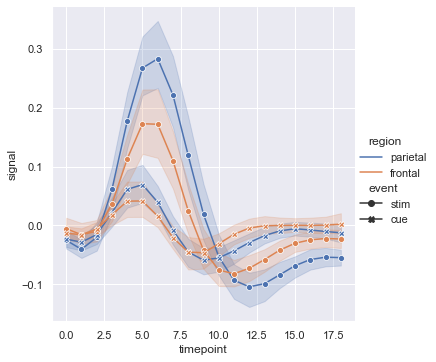

In [40]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'region', style = 'event', kind = 'line', data = fmri, markers = True, dashes = False)

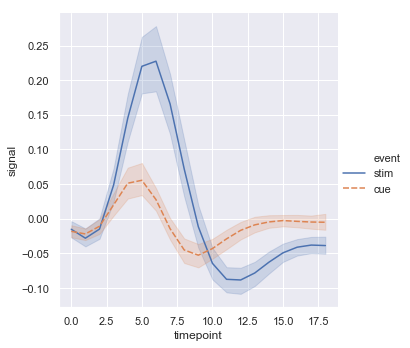

In [26]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event', style = 'event', kind = 'line', data = fmri)

In [44]:
df = pd.DataFrame(dict(time = pd.date_range('2019-06-02', periods = 500), value = randn(500).cumsum()))

In [45]:
df.head()

,time,value
0,2019-06-02,0.527791
1,2019-06-03,1.357443
2,2019-06-04,2.072388
3,2019-06-05,1.910418
4,2019-06-06,2.315654


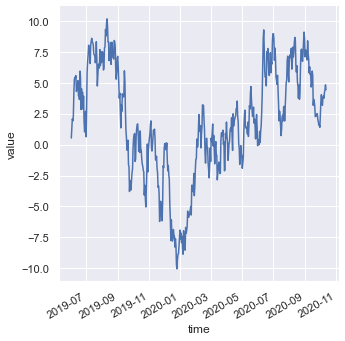

In [46]:
g = sns.relplot(x = 'time', y = 'value', kind = 'line', data = df)
g.fig.autofmt_xdate()

In [47]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


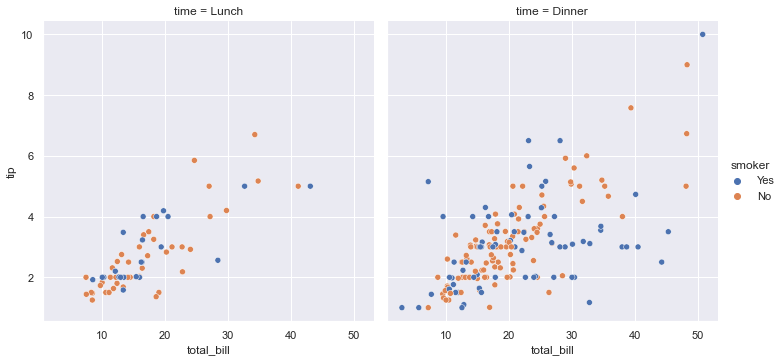

In [48]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'time', data = tips)

In [50]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'size', data = tips)

ValueError: could not broadcast input array from shape (244,2) into shape (244,)

In [51]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', col = 'size', data = tips, col_wrap=3, height=3)

ValueError: could not broadcast input array from shape (244,2) into shape (244,)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

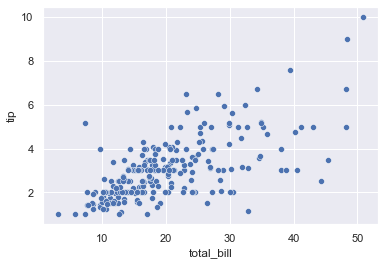

In [52]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)

In [53]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


<AxesSubplot:xlabel='timepoint', ylabel='signal'>

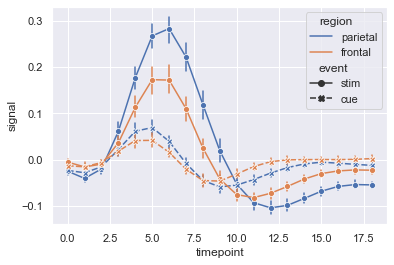

In [54]:
sns.lineplot(x = 'timepoint', y  = 'signal', style = 'event', hue = 'region', data = fmri, markers = True, ci = 68, err_style='bars')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

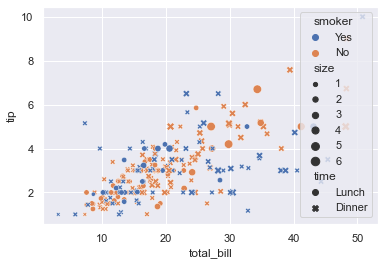

In [55]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips, hue = 'smoker', size = 'size', style = 'time')

In [56]:
iris = sns.load_dataset('iris')

In [57]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

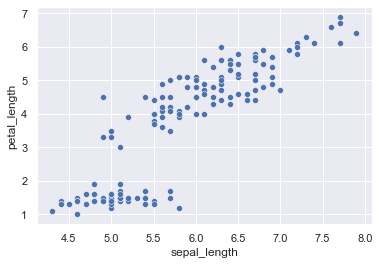

In [58]:
sns.scatterplot(x = 'sepal_length', y = 'petal_length', data = iris)

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

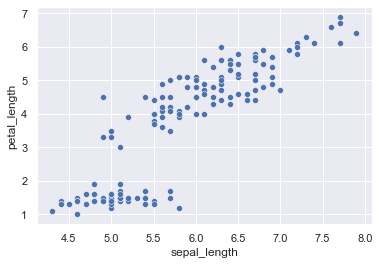

In [59]:
sns.scatterplot(x = iris['sepal_length'], y = iris['petal_length'])

### 2. Categorical Data Ploting
- catplot()
- boxplot()
- stripplot()
- swarmplot()
- etc...

In [60]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [61]:
titanic = sns.load_dataset('titanic')

In [62]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
#catplot()

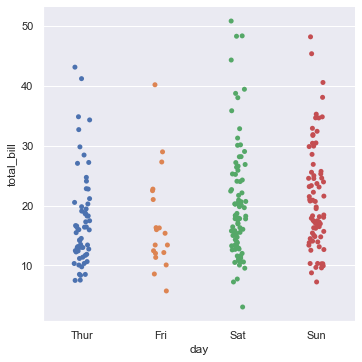

In [63]:
sns.catplot(x = 'day', y = 'total_bill', data = tips)

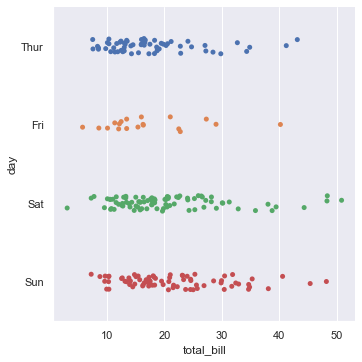

In [64]:
sns.catplot(y = 'day', x = 'total_bill', data = tips)

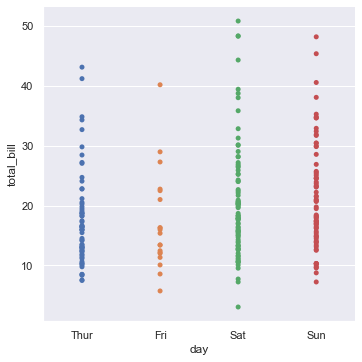

In [65]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, jitter = False)

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


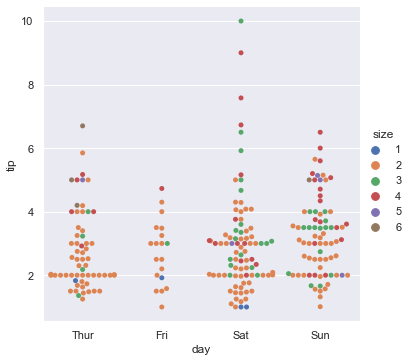

In [66]:
sns.catplot(x = 'day', y = 'tip', data = tips, kind = 'swarm', hue = 'size')

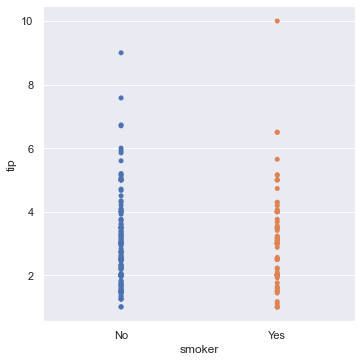

In [67]:
sns.catplot(x = 'smoker', y = 'tip', data = tips, order= ['No', 'Yes'],jitter=False)

In [68]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


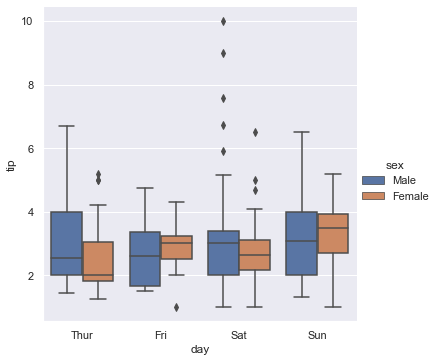

In [69]:
sns.catplot(x = 'day', y = 'tip', kind = 'box', data = tips, hue = 'sex')

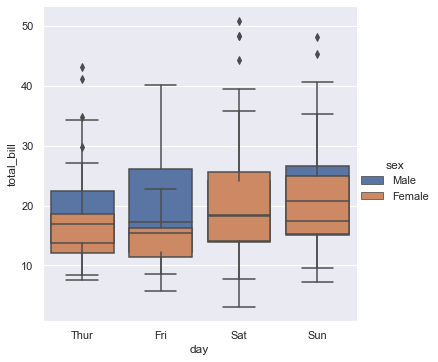

In [70]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'box', data = tips, hue = 'sex', dodge = False)

In [71]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


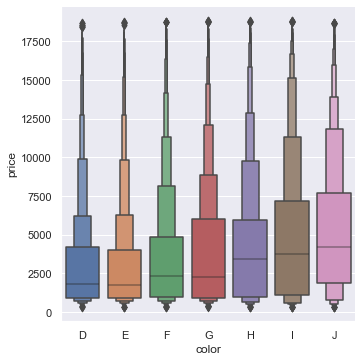

In [72]:
sns.catplot(x = 'color', y = 'price', kind = 'boxen', data = diamonds.sort_values('color'))

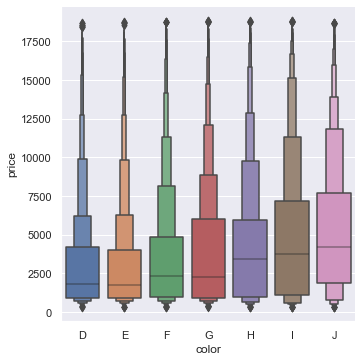

In [73]:
sns.catplot(x = 'color', y = 'price', kind = 'boxen', data = diamonds.sort_values('color'))

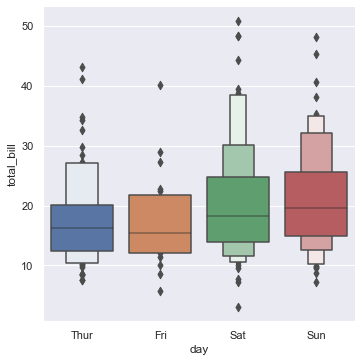

In [74]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'boxen', data = tips, dodge = False)

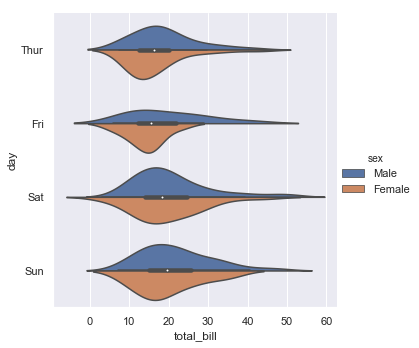

In [58]:
sns.catplot(x = 'total_bill', y = 'day', hue = 'sex', kind = 'violin', data = tips, split = True,)

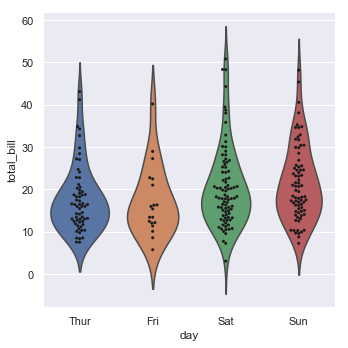

In [59]:
g = sns.catplot(x = 'day', y = 'total_bill', kind = 'violin', inner = None, data = tips)

sns.swarmplot(x = 'day', y = 'total_bill', color = 'k', size = 3, data = tips, ax = g.ax)

In [149]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


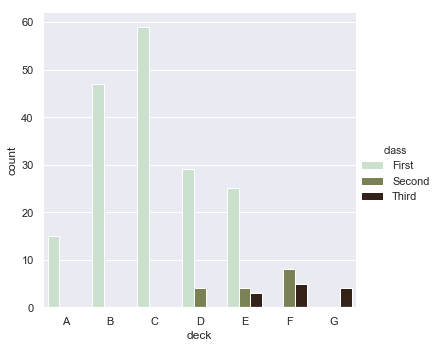

In [61]:
sns.catplot(x = 'deck', kind = 'count', palette = 'ch:0.95', data = titanic, hue = 'class')

### 3. Visualizing Distribution of the Data
- distplot()
- kdeplot()
- jointplot()
- rugplot()

In [77]:
from numpy.random import *
x = randn(1000)
x

array([ 6.86672255e-01, -2.32901758e-01, -6.22449742e-01,  1.03844582e-01,
       -6.66966363e-01,  4.43129965e-01, -1.74509264e-01,  6.62438519e-01,
       -1.26368882e-01,  3.94773609e-01,  1.75126441e-01, -8.48066831e-01,
       -4.40436610e-01, -2.61826131e-01,  3.97993477e-01, -8.30913225e-03,
        4.86542900e-01, -1.22173475e+00, -1.16368629e+00,  5.06242582e-01,
       -8.71571005e-01,  1.06670348e+00,  8.16849786e-02,  6.75017697e-01,
       -8.12599709e-01,  1.52231997e+00, -1.38595295e+00, -1.17277129e+00,
        5.77941651e-01, -6.76811436e-01, -2.75110635e-01,  1.11752846e+00,
       -9.07062602e-01,  1.02924676e+00, -8.20234306e-01, -1.92475258e-01,
        6.07710800e-01, -1.23376271e+00,  2.63942100e-03, -4.18533838e-01,
        3.31661355e-01, -3.43010479e-01,  9.54338896e-01, -2.40615111e-01,
        1.04993922e+00, -1.07661195e+00,  1.03130524e+00,  7.41825689e-01,
       -1.73545601e-01,  1.56226176e-02,  6.43722837e-01, -7.77626998e-01,
       -1.11810320e+00,  

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

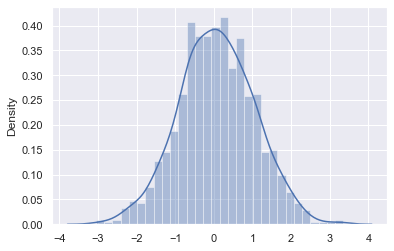

In [78]:
sns.distplot(x, kde = True, hist = True, rug= False, bins= 30)

In [80]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [81]:
x = tips['total_bill']
y = tips['tip']

In [82]:
x

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

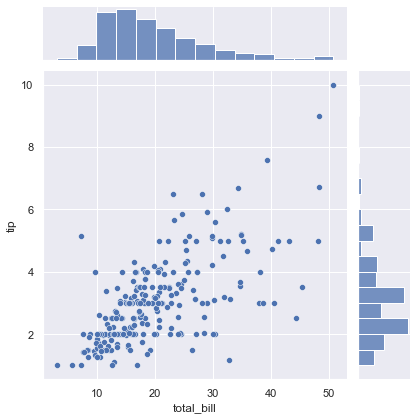

In [83]:
sns.jointplot(x = x, y=y)

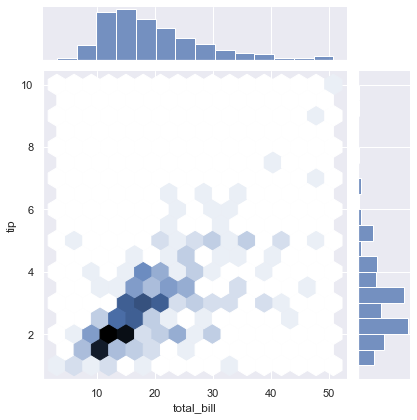

In [84]:
sns.set()
sns.jointplot(x = x, y=y, kind = 'hex')

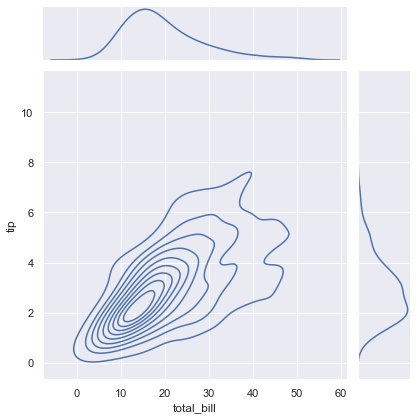

In [85]:
sns.jointplot(x = x, y = y, kind = 'kde')

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

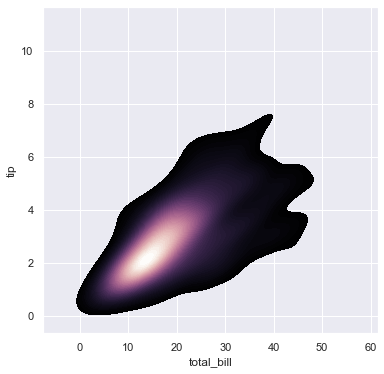

In [86]:
f, ax = plt.subplots(figsize = (6,6))

cmap = sns.cubehelix_palette(as_cmap = True, dark = 0, light = 1, reverse= True)

sns.kdeplot(x, y, cmap = cmap, n_levels=60, shade=True)

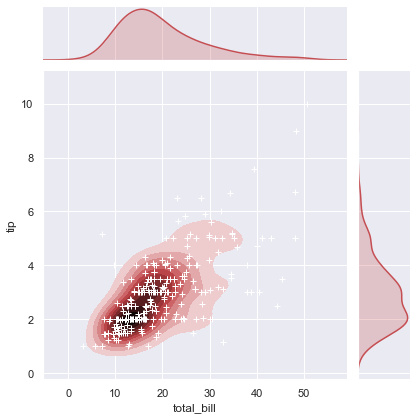

In [26]:
g = sns.jointplot(x, y, kind = 'kde', color = 'r')
g.plot_joint(plt.scatter, c = 'w', s = 30, linewidth = 1, marker = '+')
g.ax_joint.collections[0].set_alpha(0)

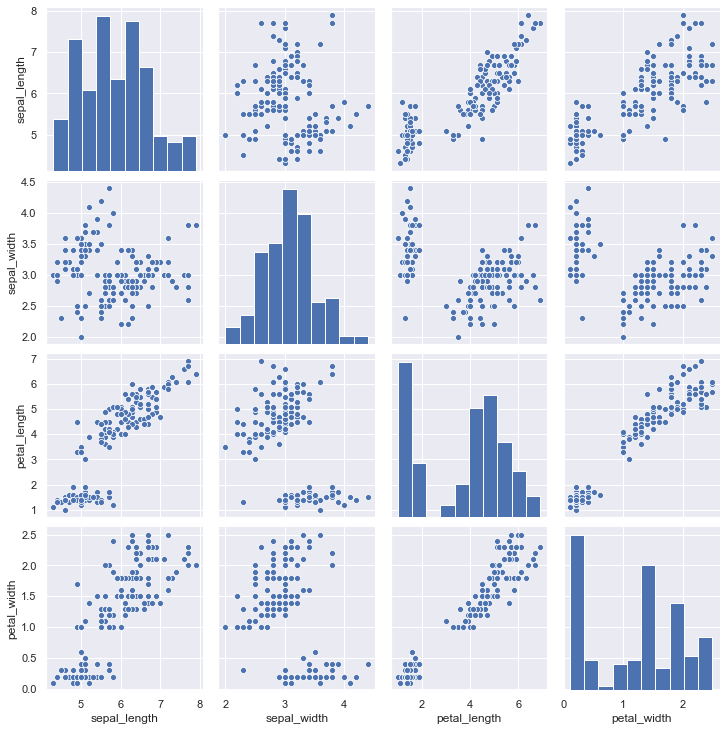

In [27]:
iris= sns.load_dataset('iris')
sns.pairplot(iris)

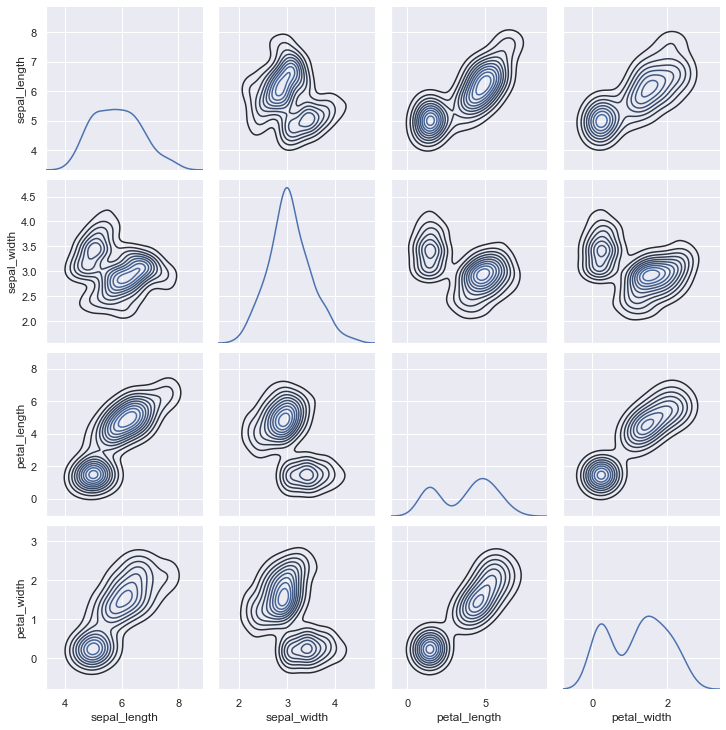

In [28]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels = 10)

### 4. Linear Regression and Relationship
- regplot()
- lmplot()

In [87]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


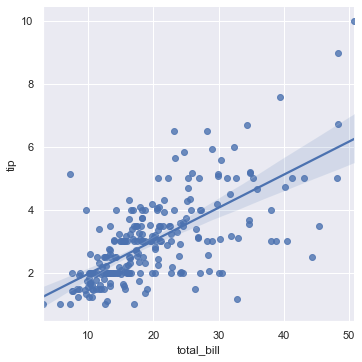

In [88]:
sns.lmplot(x = 'total_bill', y= 'tip', data = tips)

In [91]:
    data = sns.load_dataset('anscombe')
    data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [90]:
data['dataset'].value_counts()

II     11
IV     11
III    11
I      11
Name: dataset, dtype: int64

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

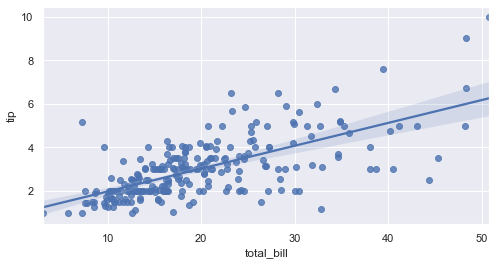

In [93]:
f, ax = plt.subplots(figsize = (8,4))
sns.regplot(x = 'total_bill', y = 'tip', data = tips, ax = ax)
ax

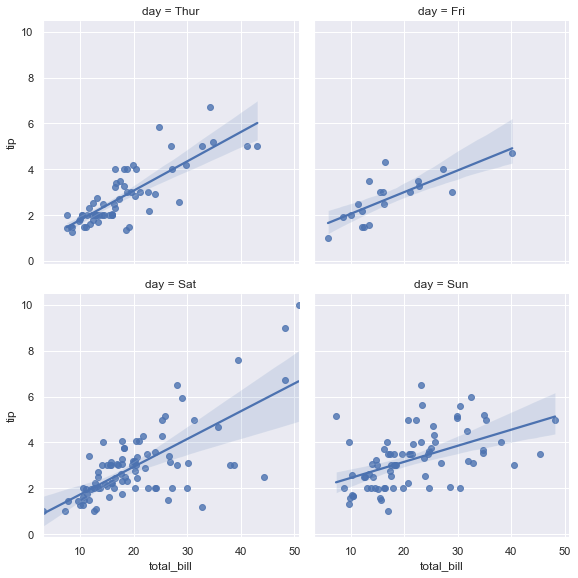

In [94]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', col_wrap=2, height = 4)

### 5. Controlling Ploted Figure Aesthetics
- figure styling
- axes styling
- color palettes
- etc..

In [97]:
def sinplot():
    x = np.linspace(0, 14, 100)
    for i in range(1, 5):
        plt.plot(x, np.sin(x+i*0.5)*(7-i))

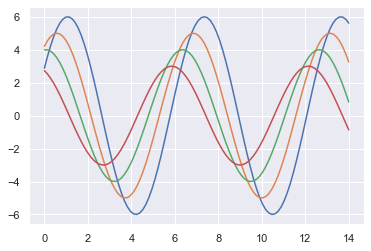

In [98]:
sinplot()

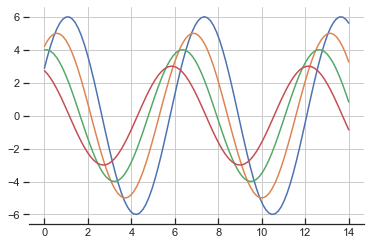

In [99]:
sns.set_style('ticks', {'axes.grid': True, 'xtick.direction': 'in'})

sinplot()
sns.despine(left = True, bottom= False)

In [100]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'in',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [101]:
sns.set_style('darkgrid')

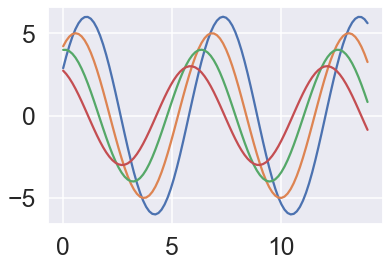

In [102]:
sns.set_context('talk', font_scale=1.5)
sinplot()

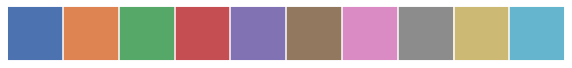

In [103]:
current_palettes = sns.color_palette()
sns.palplot(current_palettes)

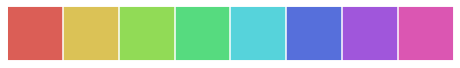

In [104]:
sns.palplot(sns.color_palette('hls', 8))